<a href="https://colab.research.google.com/github/Archalharin/229352-stat-for-data-science/blob/main/660510632_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [ ]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

print(y)
print(X)

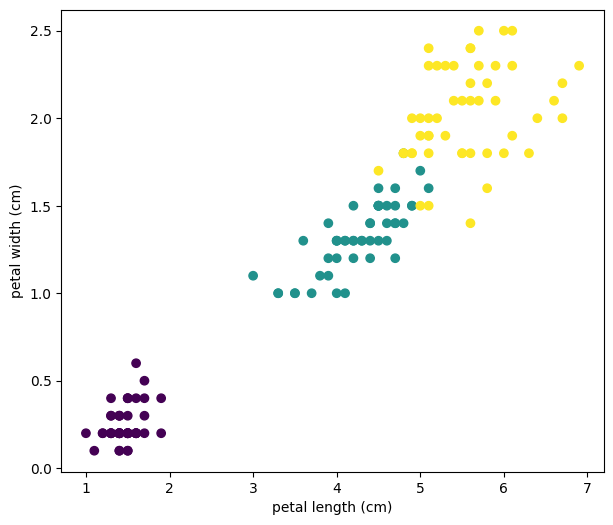

In [4]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [17]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [8]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

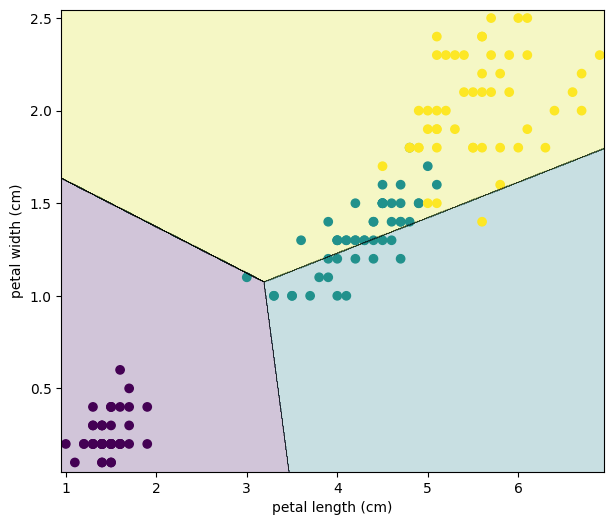

In [9]:
#LinerSVC
linsvm = LinearSVC(C=0.1)

linsvm.fit(X_train, y_train)

plot_decision_boundary(linsvm, X, y)

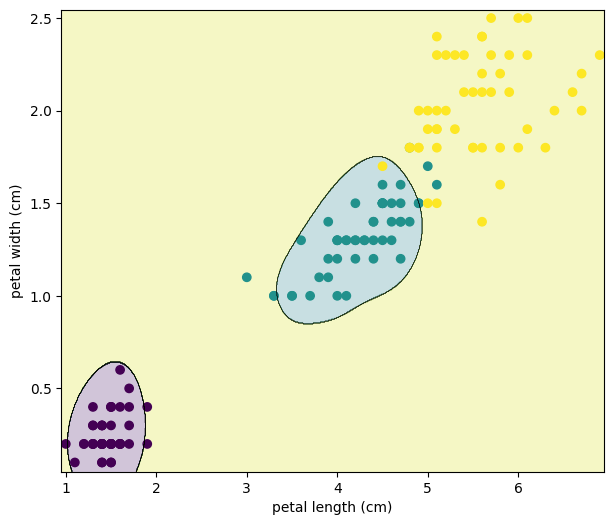

In [10]:
#SVC
svm = SVC(C=0.1, kernel='rbf', gamma=10)

svm.fit(X_train, y_train)

plot_decision_boundary(svm, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

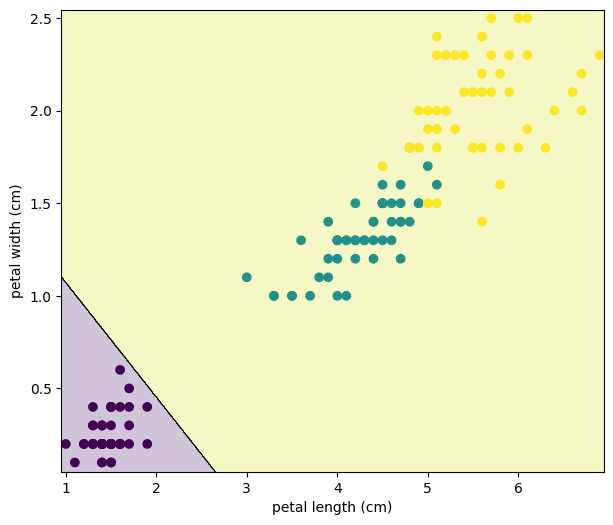

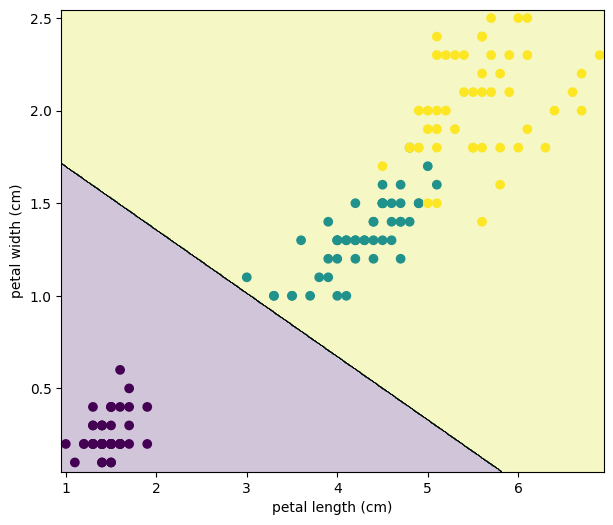

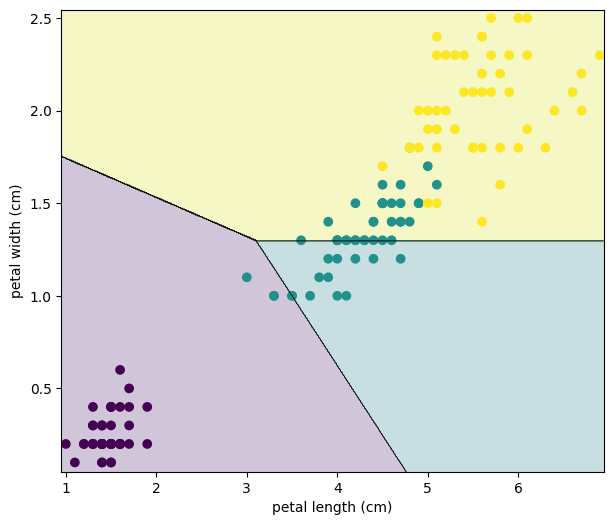

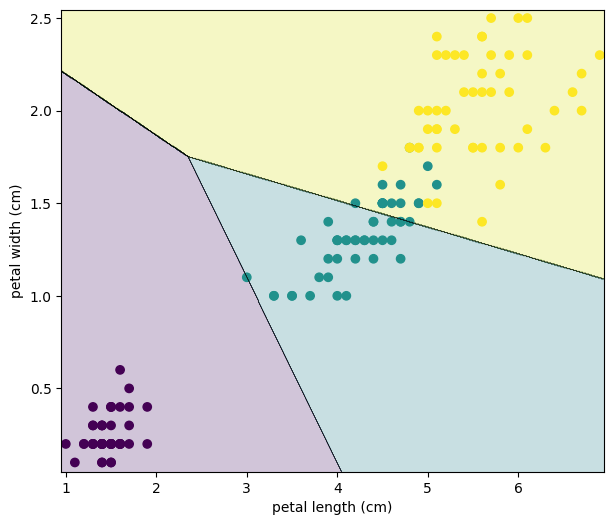

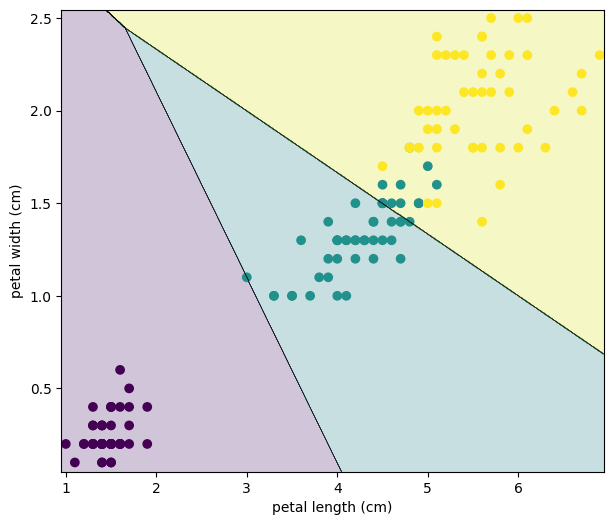

In [40]:
#TODO
for i in [0.01, 0.1, 1.0, 10.0, 100.0]:
  linsvm = LinearSVC(C = i, loss='hinge', max_iter=100000)
  linsvm.fit(X_train, y_train)
  plot_decision_boundary(linsvm, X, y)

**What is the effect of C on the decision boundary**

เมื่อเลือก C = 0.01 จะทำให้ลักษณะของ Margin และ จะมีความกว้างมากโมเดลจะยอมให้มีจุดข้อมูลบางจุดล้ำเข้ามาใน Margin หรือถูกจำแนกผิดได้มากขึ้น (Soft Margin) เพื่อรักษาเส้นแบ่งให้เรียบง่าย

แล้วถ้าเลือก C =100.0 จะทำให้ลักษณะของ Margin จะมีความแคบมาก
และ โมเดลจะพยายามจำแนกจุดข้อมูลทุกจุดให้ถูกต้องที่สุด และยอมให้มีจุดล้ำเข้ามาใน Margin น้อยมาก (Harder Margin)

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [51]:
from sklearn.metrics import accuracy_score

In [65]:
#TODO
linsvm1 = LinearSVC(C = 100.0, loss='hinge', max_iter=100000)
linsvm1.fit(X_train, y_train)
y_pred = linsvm1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy
print("Test error:", test_error)

Test error: 0.0888888888888889


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

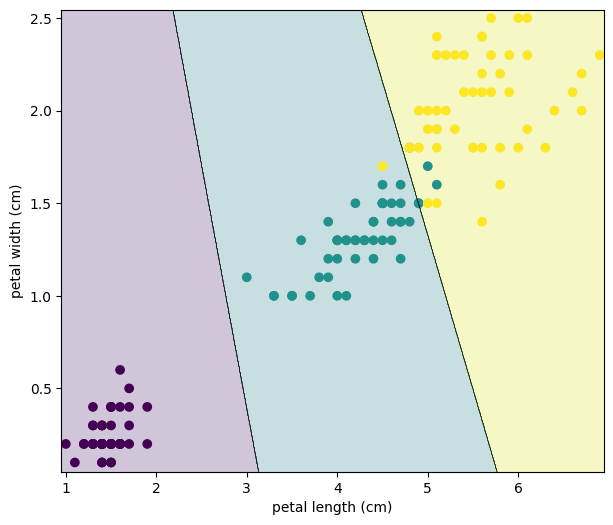

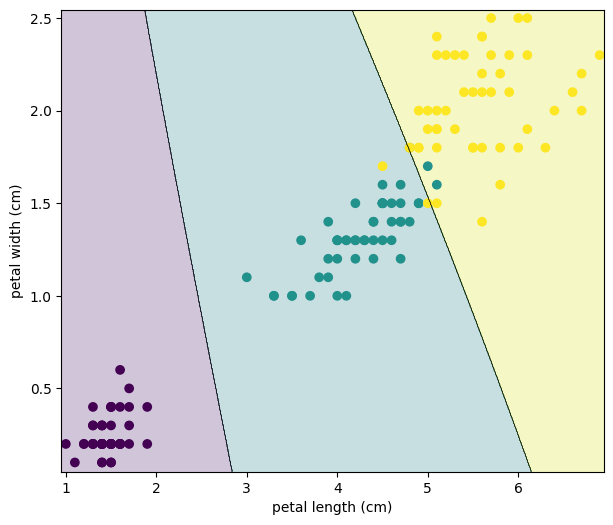

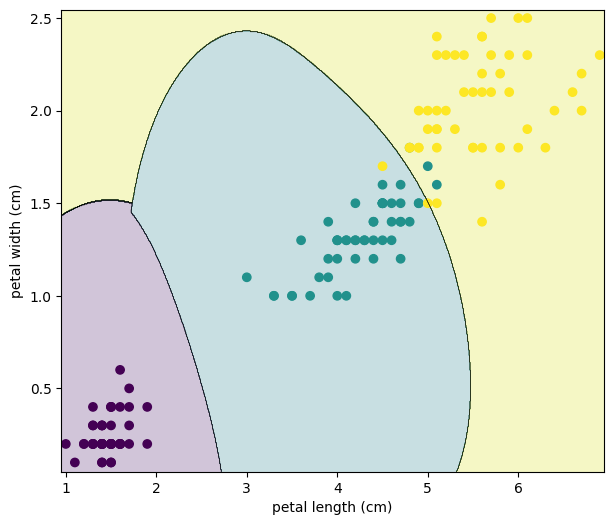

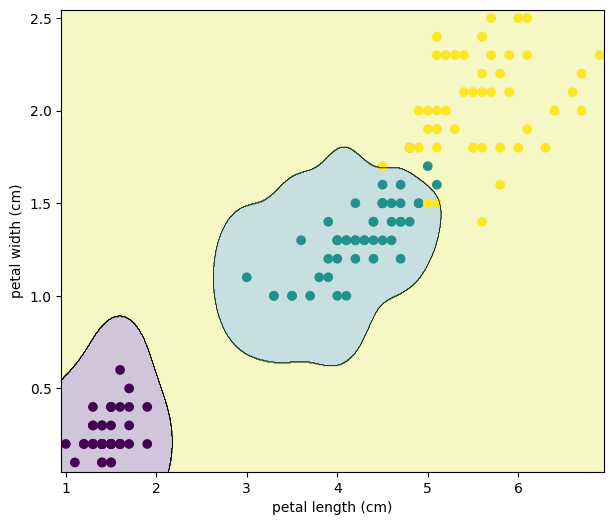

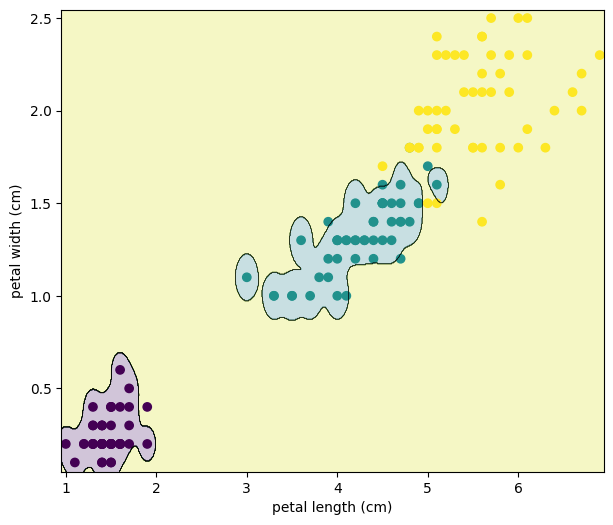

In [25]:
#TODO
for g in [0.01, 0.1, 1.0, 10.0, 100.0]:
  svm1 = SVC(C=1.0, kernel='rbf', gamma=g, max_iter=100000)
  svm1.fit(X_train, y_train)
  plot_decision_boundary(svm1, X, y)

**What is the effect of gamma on the decision boundary?**

เมื่อเลือก gamma =0.01 จุดข้อมูลแต่ละจุดจะมีอิทธิพลครอบคลุมพื้นที่กว้าง เส้นแบ่งจะมีความเรียบ (Smooth) และโค้งมนน้อย ดูคล้ายเส้นตรงมากขึ้น

แล้วถ้าเลือก gamma =100.0 จุดข้อมูลจะมีอิทธิพลเฉพาะพื้นที่ใกล้ๆ ตัวเองเท่านั้น เส้นแบ่งจะมีความขรุขระ (Wiggly) และพยายามคดเคี้ยวไปโอบล้อมจุดข้อมูลแต่ละจุดอย่างใกล้ชิด

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [48]:
#TODO
svm2 = SVC(C=1.0, kernel='rbf', gamma=10.0, max_iter=100000)
svm2.fit(X_train, y_train)
y_pred =svm2.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
test_error1 = 1 - accuracy1
print("Test error:", test_error1)
print("Number of support vectors:", svm2.n_support_)

Test error: 0.0444444444444444
Number of support vectors: [ 8 17 24]


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?

**Linear SVM**
****
1. Explain using test accuracy \
เมื่อโมเดลทั้งสองแบบให้ความแม่นยำที่ไม่ต่างกัน เราควรเลือกโมเดลที่ เรียบง่ายกว่า โมเดลที่ซับซ้อนน้อยกว่ามักจะมีความทนทาน และไม่ค่อยเกิดปัญหา Overfitting เมื่อนำไปใช้กับข้อมูลใหม่ๆ

2. Explaing using decision boundary plot \
ในข้อมูลชุดนี้มีลักษณะที่สามารถแยกกันโดยใช้เส้นตรง (Nearly Linearly Separable) ซึ่งการใช้ Kernel จะทำให้เส้นแบ่งโค้งงอจึงเป็นการเพิ่มความซับซ้อนที่เกินความจำเป็น

In [66]:
#TODO
print(" Linear SVM Test error: " ,test_error)
print(" Kernel SVM Test error: " ,test_error1)

 Linear SVM Test error:  0.0888888888888889
 Kernel SVM Test error:  0.0444444444444444


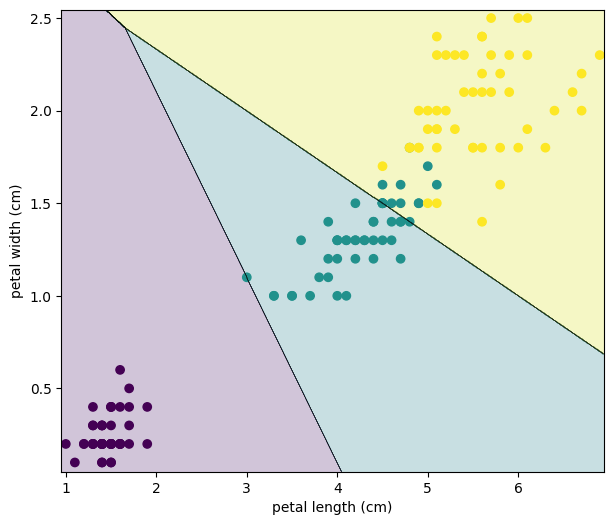

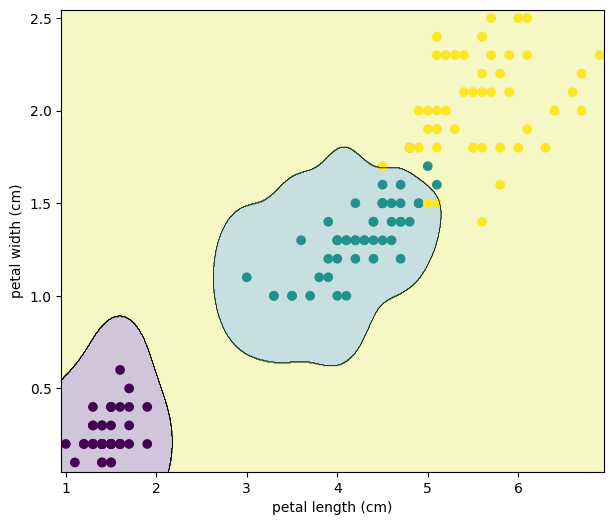

In [67]:
plot_decision_boundary(linsvm1, X, y)
plot_decision_boundary(svm2, X, y)